# Principais gastos de uma cidade em um ano

#### First, define a city and year

In [172]:
city = 'araraquara'
year = '2018'

#### Download the data from tce

In [173]:
# download expenses file
# Files have the url:
# https://transparencia.tce.sp.gov.br/sites/default/files/csv/despesas-{city}-{year}.zip
# !pip install wget
import wget
url_prefix = "https://transparencia.tce.sp.gov.br/sites/default/files/csv/despesas"
expenses_url = url_prefix + "-" + city + "-" + str(year) + ".zip"
expenses_zipfile = '../data/expense_{}_{}.zip'.format(city, year)
wget.download(expenses_url, expenses_zipfile)

'../data/expense_araraquara_2018 (1).zip'

In [174]:
# Extract file
import zipfile
with zipfile.ZipFile(expenses_zipfile, 'r') as zip_ref:
    expenses_csv = '../data/' + zip_ref.namelist()[-1]
    extracted_files = zip_ref.extractall('../data/')
print(expenses_csv)

../data/despesas-araraquara-2018.csv


#### Create data frame with expenses

In [175]:
# Create df with csv
import pandas as pd
data = pd.read_csv(expenses_csv, delimiter=';', encoding='Windows 1252')

# set vl_despesa as floating point
data['vl_despesa'] = data['vl_despesa'].apply(lambda desp: float(desp.replace(',', '.')))

In [176]:
pd.set_option('display.max_columns', 31)
data.head()

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,dt_emissao_despesa,vl_despesa,ds_funcao_governo,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,387303460,2018,Araraquara,PREFEITURA MUNICIPAL DE ARARAQUARA,1,Janeiro,Empenhado,1062-2018,CNPJ - PESSOA JURÍDICA - 43976844000185,APAE-ASS.PAIS E AMIG.DOS EXCEPCIONAIS,05/01/2018,39000.0,SAÚDE,ASSISTÊNCIA HOSPITALAR E AMBULATORIAL,80,CUIDANDO DAS PESSOAS - ASSISTÊNCIA DE MÉDIA E ...,2177,Manutencao e desenvolvimento das unidades de s...,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS,0300 - SAÚDE - RECURSOS ESPECÍFICOS,OUTROS/NÃO APLICÁVEL,33503900 - OUTROS SERVIÇOS DE TERCEIROS -PESSO...,ASSIST HOSP E AMB DE MEDIA E ALTA COMPLEX PAGT...
1,387303461,2018,Araraquara,PREFEITURA MUNICIPAL DE ARARAQUARA,1,Janeiro,Empenhado,1031-2018,CNPJ - PESSOA JURÍDICA - 23232208000131,V M WAGNER COMERCIAL E DISTRIBUIDORA DE PAPELA...,31/01/2018,2660.0,SAÚDE,ATENÇÃO BÁSICA,79,SAÚDE MAIS PERTO DE VOCÊ: AMPLIANDO ACESSO E Q...,2174,Manutencao das Atividades/Acoes/Servicos de At...,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS,0300 - SAÚDE - RECURSOS ESPECÍFICOS,PREGÃO,33903017 - MATERIAL DE PROCESSAMENTO DE DADOS,Necessidade de utilizacao nas unidades para im...
2,387303463,2018,Araraquara,PREFEITURA MUNICIPAL DE ARARAQUARA,1,Janeiro,Empenhado,1037-2018,CNPJ - PESSOA JURÍDICA - 08855152000188,VINICIUS DO AMARAL ROLANDIA ME,31/01/2018,4752.0,SAÚDE,ASSISTÊNCIA HOSPITALAR E AMBULATORIAL,81,SOS: URGÊNCIA E EMERGÊNCIA,2178,Manutencao do funcionamento das unidade de urg...,TESOURO,0310 - SAÚDE - GERAL,PREGÃO,"44905208 - APARELHOS, EQUIPAMENTOS, UTENSÍLIOS...",AQUISICAO DE MOVEIS E ELETRODOMESTICOS PARA UN...
3,387303464,2018,Araraquara,PREFEITURA MUNICIPAL DE ARARAQUARA,1,Janeiro,Empenhado,1085-2018,CNPJ - PESSOA JURÍDICA - 48031918002410,UNESP-UNIVERS.EST.PAULISTA-ODONTOLOG.,05/01/2018,27000.0,SAÚDE,ASSISTÊNCIA HOSPITALAR E AMBULATORIAL,80,CUIDANDO DAS PESSOAS - ASSISTÊNCIA DE MÉDIA E ...,2177,Manutencao e desenvolvimento das unidades de s...,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS,0300 - SAÚDE - RECURSOS ESPECÍFICOS,OUTROS/NÃO APLICÁVEL,"33903950 - SERVIÇO MÉDICO-HOSPITALAR, ODONTOLÓ...",ASSIST HOSP E AMB DE MEDIA E ALTA COMPLEX PAGT...
4,387303465,2018,Araraquara,PREFEITURA MUNICIPAL DE ARARAQUARA,1,Janeiro,Empenhado,1088-2018,CNPJ - PESSOA JURÍDICA - 49351786000423,BAXTER HOSPITALAR LTDA,05/01/2018,15000.0,SAÚDE,ASSISTÊNCIA HOSPITALAR E AMBULATORIAL,80,CUIDANDO DAS PESSOAS - ASSISTÊNCIA DE MÉDIA E ...,2177,Manutencao e desenvolvimento das unidades de s...,TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS,0300 - SAÚDE - RECURSOS ESPECÍFICOS,OUTROS/NÃO APLICÁVEL,"33903950 - SERVIÇO MÉDICO-HOSPITALAR, ODONTOLÓ...",ASSIST HOSP E AMB DE MEDIA E ALTA COMPLEX FAEC...


#### Grouping expenses by theme

In [177]:
# Get only paid expenses
paid_df = data[data['tp_despesa'] == 'Valor Pago']
print(paid_df.columns)
subject_df = paid_df.groupby('ds_funcao_governo').agg({'vl_despesa': 'sum', 
                                                       'ds_subfuncao_governo': 'unique'})

Index(['id_despesa_detalhe', 'ano_exercicio', 'ds_municipio', 'ds_orgao',
       'mes_referencia', 'mes_ref_extenso', 'tp_despesa', 'nr_empenho',
       'identificador_despesa', 'ds_despesa', 'dt_emissao_despesa',
       'vl_despesa', 'ds_funcao_governo', 'ds_subfuncao_governo',
       'cd_programa', 'ds_programa', 'cd_acao', 'ds_acao', 'ds_fonte_recurso',
       'ds_cd_aplicacao_fixo', 'ds_modalidade_lic', 'ds_elemento',
       'historico_despesa'],
      dtype='object')


In [178]:
subject_df.head(20)

,vl_despesa,ds_subfuncao_governo
ds_funcao_governo,,
ADMINISTRAÇÃO,2.552836e+07,"[ADMINISTRAÇÃO FINANCEIRA, ADMINISTRAÇÃO GERAL..."
AGRICULTURA,7.740704e+05,"[ADMINISTRAÇÃO GERAL, ABASTECIMENTO]"
ASSISTÊNCIA SOCIAL,1.802596e+07,"[ASSISTÊNCIA COMUNITÁRIA, ASSISTÊNCIA À CRIANÇ..."
COMÉRCIO E SERVIÇOS,8.742093e+05,"[ADMINISTRAÇÃO GERAL, SERVIÇOS FINANCEIROS, TU..."
CULTURA,6.366341e+06,"[ADMINISTRAÇÃO GERAL, DIFUSÃO CULTURAL]"
DESPORTO E LAZER,9.296070e+06,"[ADMINISTRAÇÃO GERAL, DESPORTO COMUNITÁRIO, LA..."
DIREITOS DA CIDADANIA,4.747072e+05,"[DIREITOS INDIVIDUAIS, COLETIVOS E DIFUSOS, PL..."
EDUCAÇÃO,1.731826e+08,"[EDUCAÇÃO INFANTIL, ENSINO FUNDAMENTAL, ADMINI..."
ENCARGOS ESPECIAIS,3.664141e+07,[OUTROS ENCARGOS ESPECIAIS]


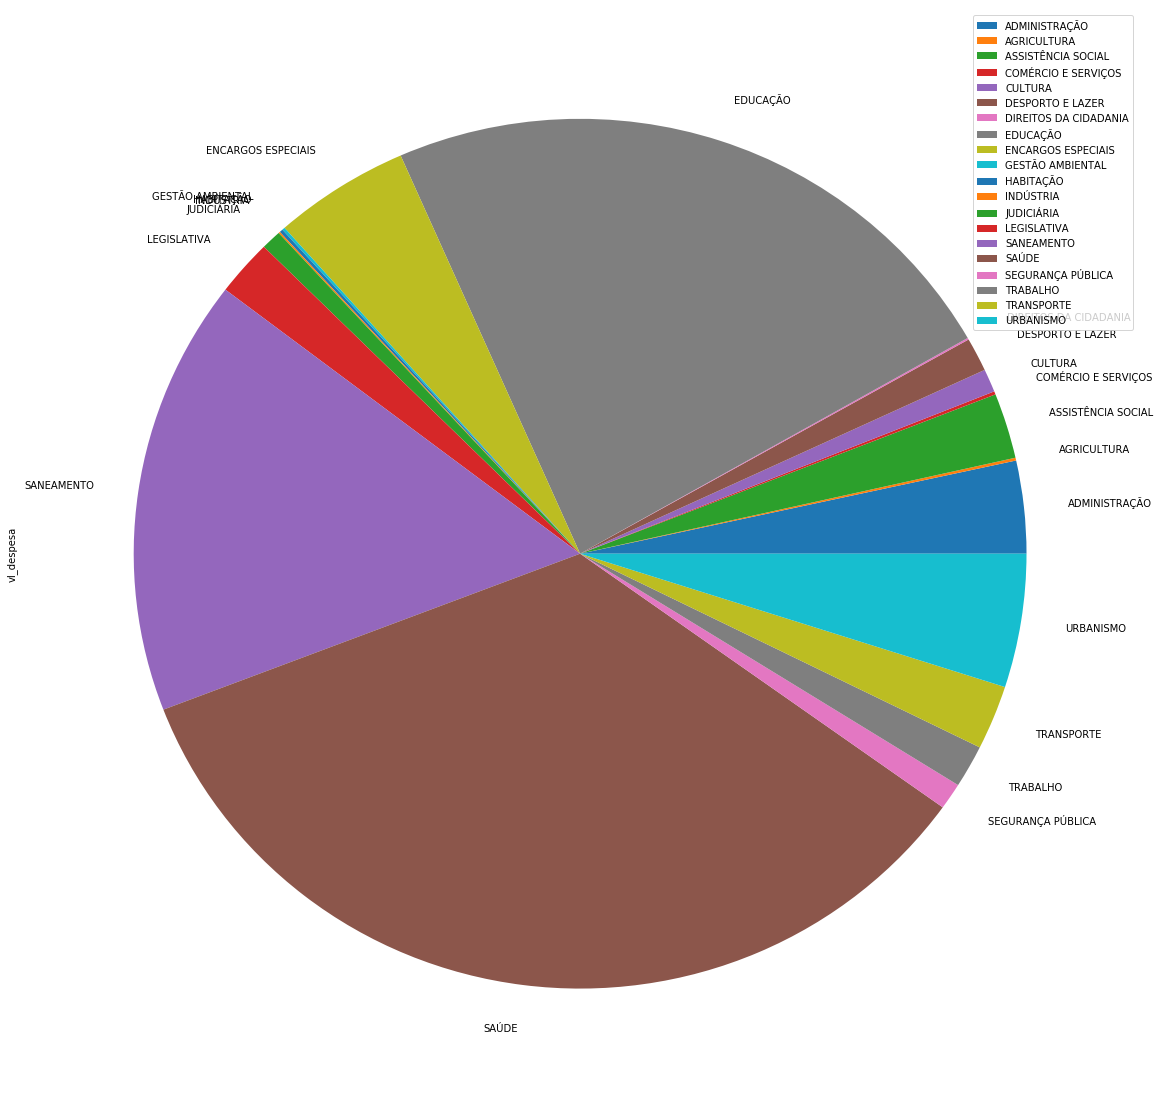

In [179]:
subject_df.plot.pie(y='vl_despesa', figsize=(20, 20))

#### For each theme, what are the sub-themes?

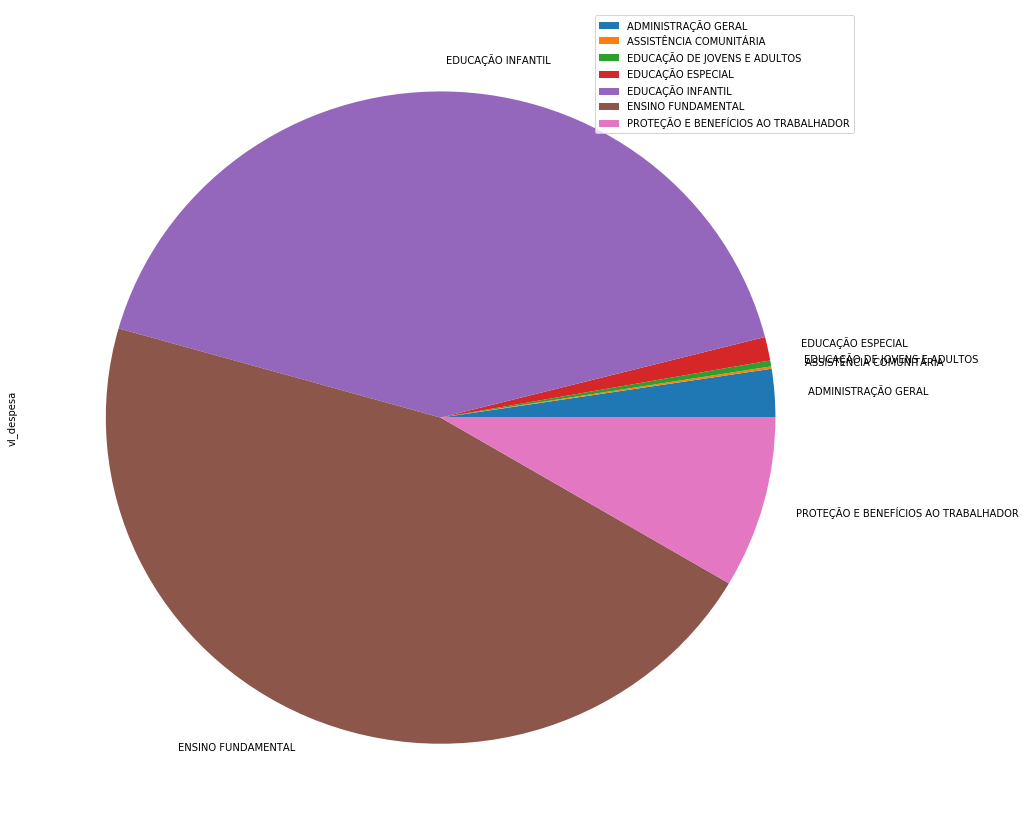

In [180]:
# for educação, as an instance
education_df = paid_df[paid_df['ds_funcao_governo'] == 'EDUCAÇÃO']\
    .groupby('ds_subfuncao_governo')\
    .agg({'vl_despesa': 'sum'})
education_df.plot.pie(y='vl_despesa', figsize=(15, 15))

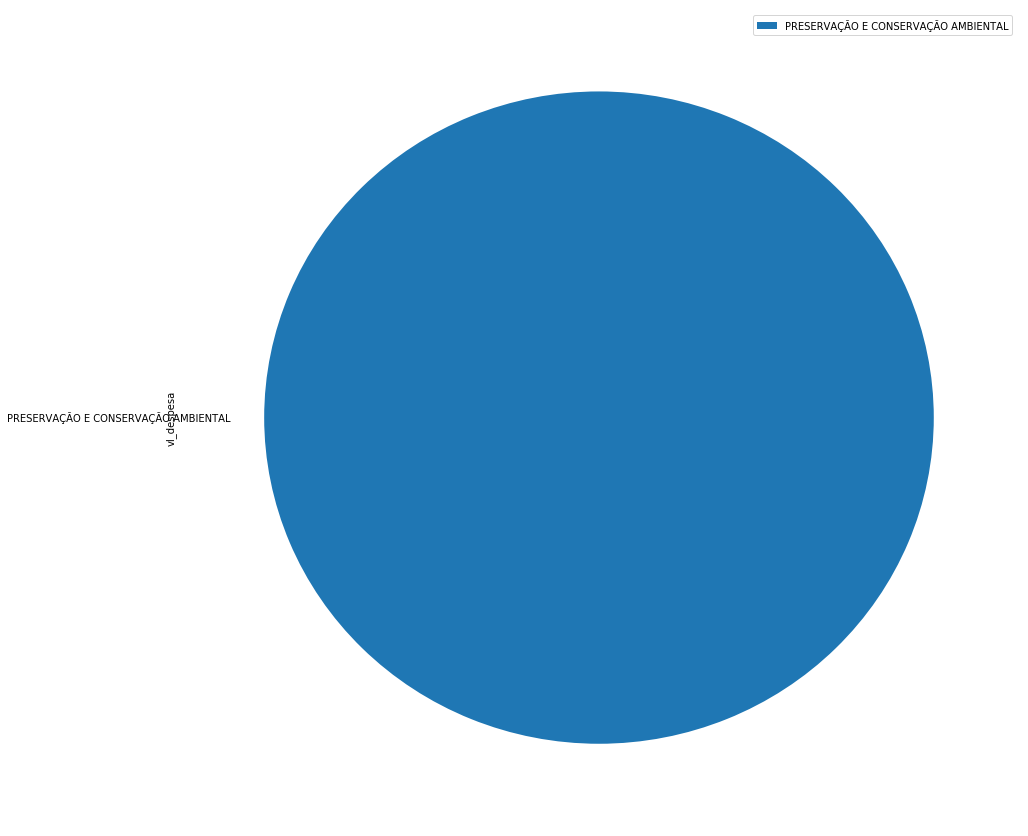

In [182]:
education_df = paid_df[paid_df['ds_funcao_governo'] == 'GESTÃO AMBIENTAL']\
    .groupby('ds_subfuncao_governo')\
    .agg({'vl_despesa': 'sum'})
education_df.plot.pie(y='vl_despesa', figsize=(15, 15))

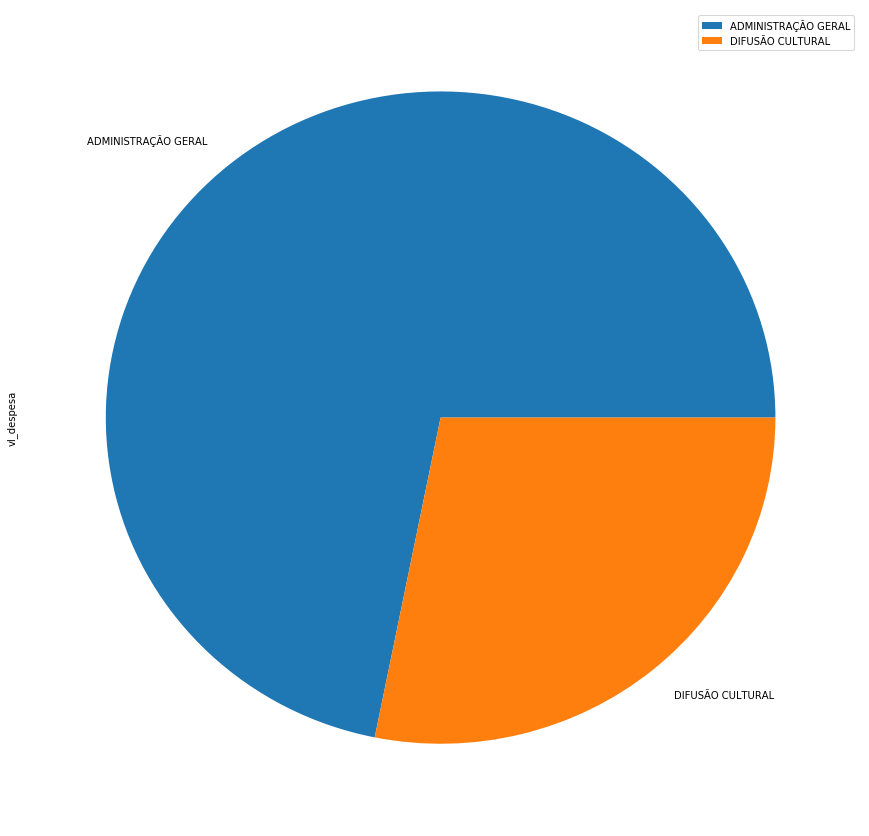

In [183]:
education_df = paid_df[paid_df['ds_funcao_governo'] == 'CULTURA']\
    .groupby('ds_subfuncao_governo')\
    .agg({'vl_despesa': 'sum'})
education_df.plot.pie(y='vl_despesa', figsize=(15, 15))

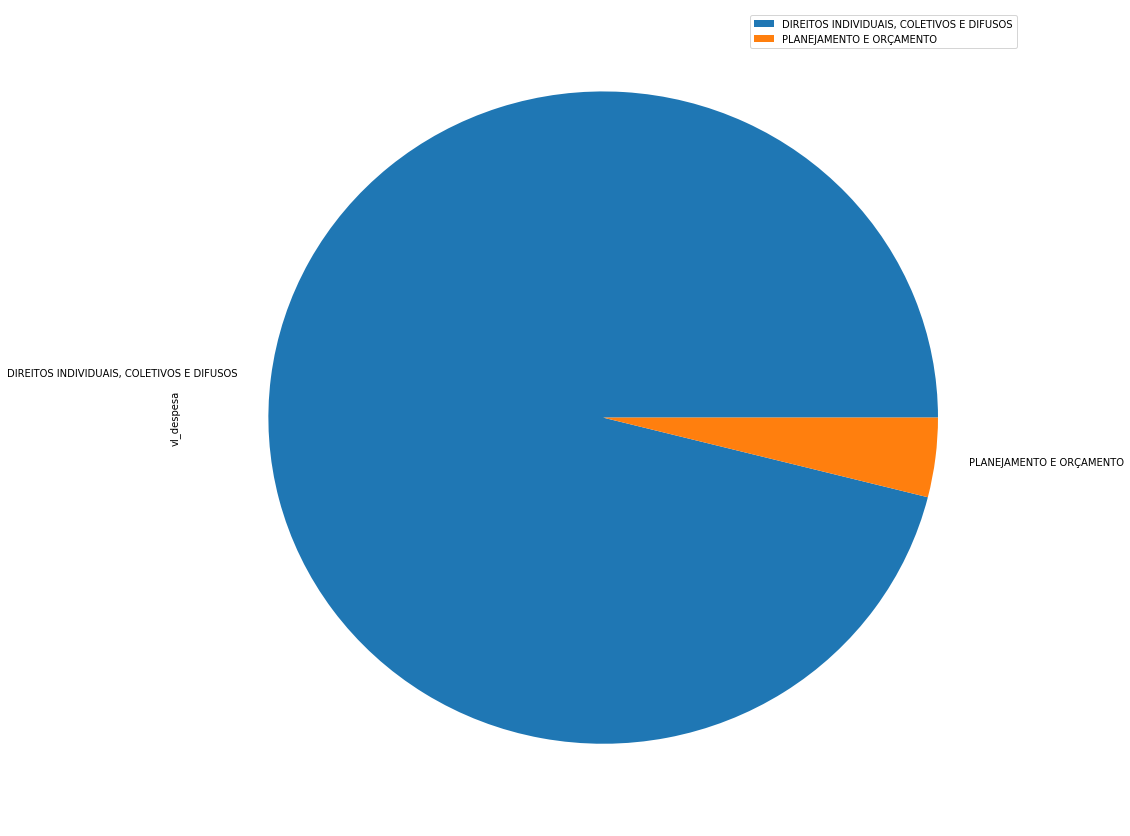

In [184]:
# for educação, as an instance
education_df = paid_df[paid_df['ds_funcao_governo'] == 'DIREITOS DA CIDADANIA']\
    .groupby('ds_subfuncao_governo')\
    .agg({'vl_despesa': 'sum'})
education_df.plot.pie(y='vl_despesa', figsize=(15, 15))